<a href="https://colab.research.google.com/github/vvasilee1/Machine-Learning-Projects/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [38]:
url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [40]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

165 people have heart disease,138 don't have

In [41]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset has not missing values

In [42]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


114 men and 24 female don't have heart disease ,93 men and 72 women have 

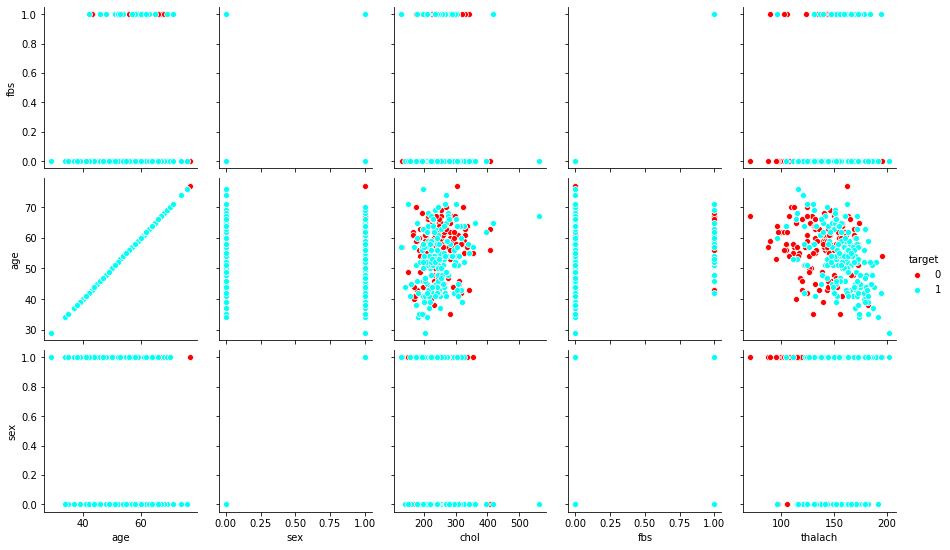

In [43]:
color = ['#ff0000','#00fff7']
x_vars = ['age','sex',	'chol'	,'fbs',	'thalach']
y_vars = ['fbs','age','sex']
sns.pairplot(df,hue='target',palette=color,x_vars=x_vars,y_vars=y_vars)

Most men with high maximum heart rate are ill,it seems that either woman or man when your maximum heart rate exceeds 130 you are ill.Most patients are among 40-60 years-old.Most patients also don't fast blood sugar and the opposite when you dont fast blood sugar you have the disease but that depends on other parameters.When you fast blood sugar you have more possibility not to have the disease

In [44]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


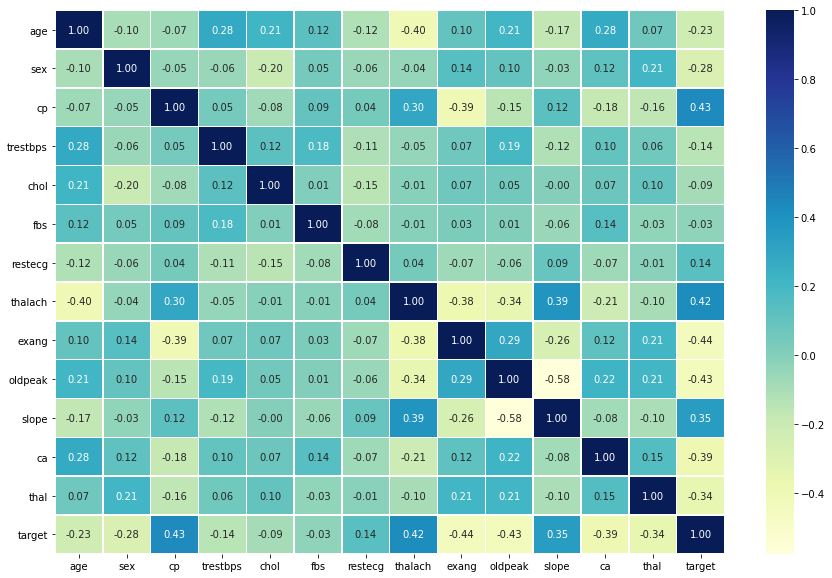

In [45]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidths=0.5,cmap="YlGnBu")

## Lets try to predict whether someone has the disease

In [46]:
X =df.drop("target",axis=1)
y = df["target"].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [48]:
y_train

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('KN',KNeighborsClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append
results=[]
names=[]
for name,model in models:
  model.fit(X_train,y_train)
  y_preds=model.predict(X_test)
  accuracy_results = accuracy_score(y_test,y_preds)
  results.append(accuracy_results)
  names.append(name)
  print('%s: %f ' % (name, accuracy_results))

LR: 0.868852 
KN: 0.688525 
RF: 0.852459 


In [51]:
results = np.array(results)
m = np.reshape(results, (1,3))
m.shape

(1, 3)

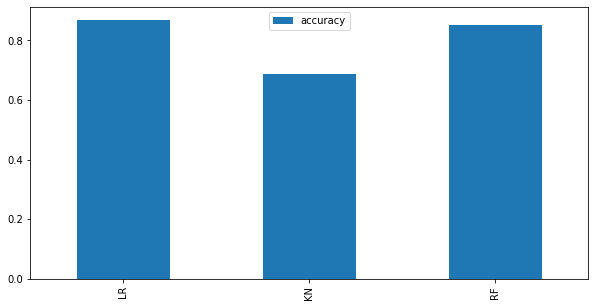

In [52]:
#results

model_comparison = pd.DataFrame(m,index = ['accuracy'],columns = names)
model_comparison.T.plot.bar(figsize = (10,5))

In [53]:
train_scores = []
test_scores = []
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [54]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

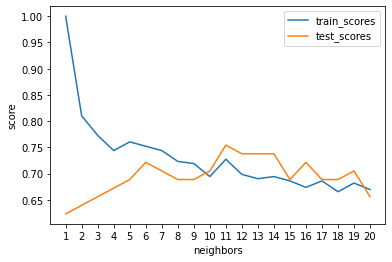

In [55]:
plt.plot(neighbors,train_scores,label='train_scores')
plt.plot(neighbors,test_scores,label = 'test_scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel("neighbors")
plt.ylabel("score")
plt.legend()

The best score for the test data is achieved when neighbors = 11 

In [56]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [57]:
np.random.seed(42)
i=RandomizedSearchCV(LogisticRegression(),log_reg_grid,cv=5,n_jobs=5,verbose=True)
i.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  41 out of  50 | elapsed:    3.3s remaining:    0.7s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    3.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=5,
                   param_distributions={'C': arr...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [58]:
i.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [59]:
i.score(X_test,y_test)

0.8852459016393442

In [60]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_jobs=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    8.7s
[Parallel(n_jobs=20)]: Done  50 out of  50 | elapsed:   41.3s finished


In [61]:
rs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 19,
 'min_samples_split': 2,
 'n_estimators': 310}

In [62]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [63]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [64]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [65]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [66]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

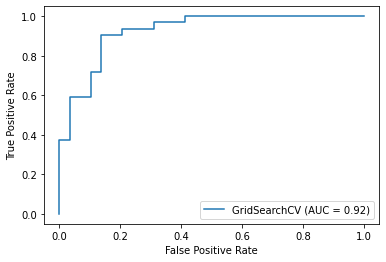

In [67]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg,X_test,y_test)

A ROC Curve like this indicates that it is far better than guessing which is a diagonal line from the lest bottom corner to the right top corner,but AUC=0.92 whilst AUC = 1 is the perfect so there is room for improvement

In [68]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

Text(69.0, 0.5, 'predicted label')

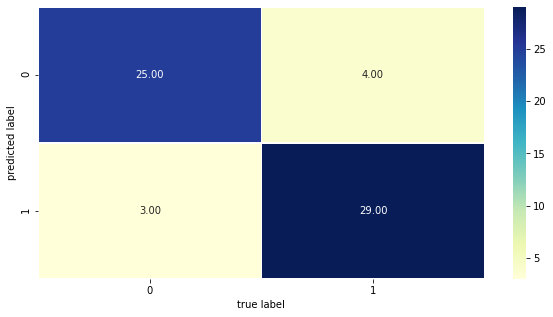

In [69]:
conf_matrix = confusion_matrix(y_test,y_preds)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,fmt='.2f',linewidths=0.5,cmap="YlGnBu")
plt.xlabel("true label")
plt.ylabel("predicted label")

In [72]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [73]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [77]:
clf = LogisticRegression(C=0.23357214690901212,solver='liblinear')
from sklearn.model_selection import  cross_val_score
scores = ['accuracy','precision','recall','f1']
cv_scores=[]
for i in scores:
  cv_score=np.mean(cross_val_score(clf,X,y,scoring=i,cv = 5))
  cv_scores.append(cv_score)

In [78]:
cv_scores

[0.8479781420765027,
 0.8215873015873015,
 0.9272727272727274,
 0.8705403543192143]

In [83]:
data = dict(zip(scores,cv_scores))
cv_metrics = pd.DataFrame(data=data,index=[0])
data

{'accuracy': 0.8479781420765027,
 'f1': 0.8705403543192143,
 'precision': 0.8215873015873015,
 'recall': 0.9272727272727274}

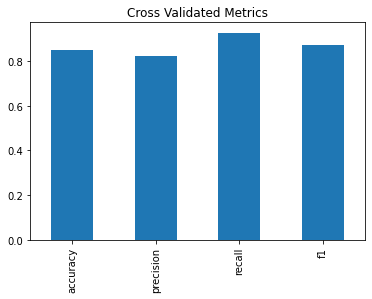

In [84]:
cv_metrics.T.plot.bar(title='Cross Validated Metrics',legend = False)

# **Feature importance**

In [85]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 0.00797727, -1.20123567,  0.77515816, -0.01096123, -0.00141249,
        -0.00150521,  0.53576151,  0.02707661, -0.82912164, -0.67646659,
         0.61886409, -0.75118301, -1.01566715]])

In [87]:
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.007977274980783986,
 'ca': -0.7511830108198086,
 'chol': -0.0014124858325897695,
 'cp': 0.7751581586202244,
 'exang': -0.8291216372511367,
 'fbs': -0.0015052070779058456,
 'oldpeak': -0.6764665918495661,
 'restecg': 0.5357615095573475,
 'sex': -1.2012356700092242,
 'slope': 0.6188640880142453,
 'thal': -1.015667151321624,
 'thalach': 0.02707661169440959,
 'trestbps': -0.010961228609520382}

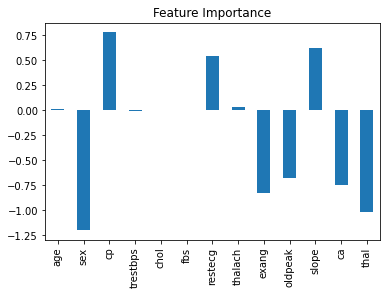

In [90]:
features_df = pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title = 'Feature Importance',legend = False)